 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [86]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [87]:
# Reading whale returns
whale_df = pd.read_csv(Path('Resources/whale_returns.csv'),
 index_col='Date',infer_datetime_format= True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [88]:
# Count nulls
whale_df_nulls = whale_df.isnull().sum()
whale_df_nulls

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [89]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [90]:
# Reading algorithmic returns
algo_df = pd.read_csv(Path('Resources/algo_returns.csv'),
 index_col='Date',infer_datetime_format= True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [91]:
# Count nulls
algo_df_nulls = algo_df.isnull().sum()
algo_df_nulls


Algo 1    0
Algo 2    6
dtype: int64

In [92]:
# Drop nulls
algo_df['Algo 2'] = algo_df['Algo 2'].fillna(0)
algo_df.head(8)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,0.000000
2014-05-29,0.003978,0.000000
2014-05-30,0.004464,0.000000
2014-06-02,0.005692,0.000000
2014-06-03,0.005292,0.000000
2014-06-04,-0.001838,0.000000
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [93]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(Path('Resources/sp500_history.csv'),
 index_col='Date',infer_datetime_format= True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [94]:
# Check Data Types
sp500_df.dtypes


Close    object
dtype: object

In [95]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","")
sp500_df['Close'] = sp500_df['Close'].astype("float")
sp500_df.dtypes


Close    float64
dtype: object

In [96]:
# Calculate Daily Returns
sp500_df_returns = sp500_df.pct_change()
sp500_df_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [97]:
# Drop nulls
sp500_df_returns = sp500_df_returns.dropna()

In [98]:
# Rename `Close` Column to be specific to this portfolio.

sp500_df_returns.columns = ['SP500_Returns']
sp500_df_returns.head()


,SP500_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [99]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_returns_combined = pd.concat([sp500_df_returns,algo_df,whale_df],axis = 'columns',join='inner')
whale_returns_combined.sort_index(inplace=True)
whale_returns_combined.tail(10)


,SP500_Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-09,-0.006067,0.012012,-0.011639,-0.005657,-0.004396,-0.006536,-0.002497
2019-04-10,0.003478,-0.004221,0.009632,0.009808,0.008366,0.002912,0.005269
2019-04-11,0.000038,0.001705,-0.001568,0.003406,-0.003959,-0.000637,-0.000496
2019-04-12,0.006609,-0.005501,0.004504,0.005663,-0.001165,0.004217,0.007316
2019-04-15,-0.000629,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-22,0.001012,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

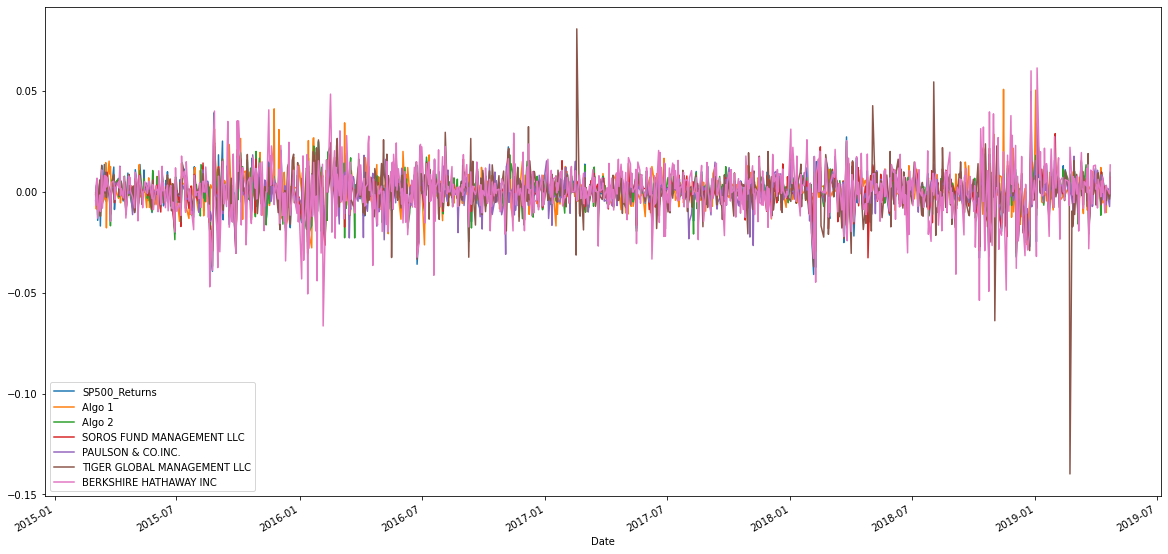

In [100]:
# Plot daily returns of all portfolios
whale_returns_combined.plot(
    figsize=(20,10)
)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

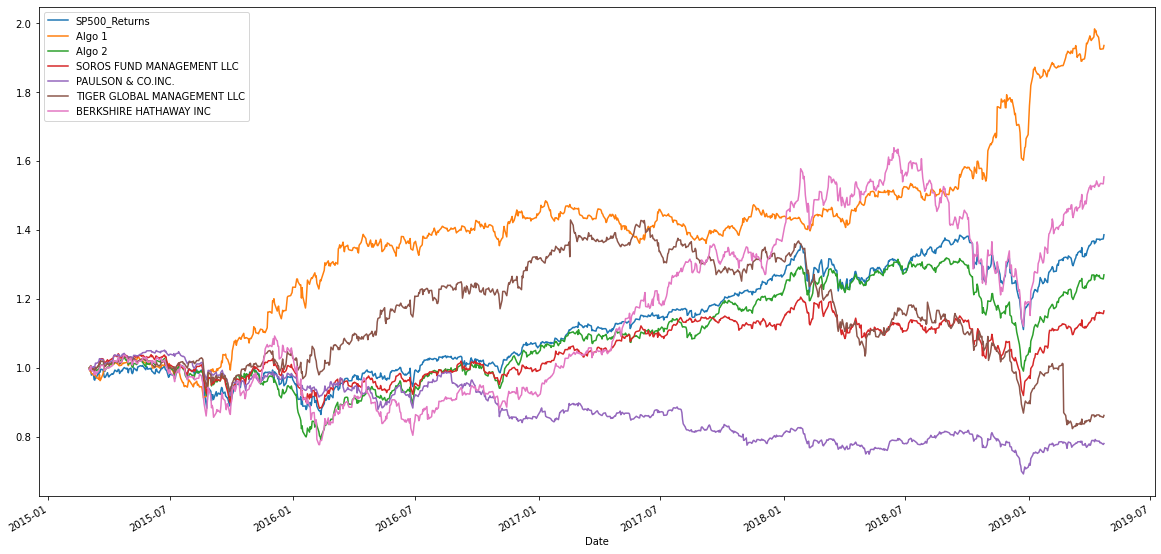

In [101]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns = (whale_returns_combined + 1).cumprod()


# Plot cumulative returns
whale_cumulative_returns.plot(
figsize=(20,10)
)


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Full Portfolio Returns Plot'}>

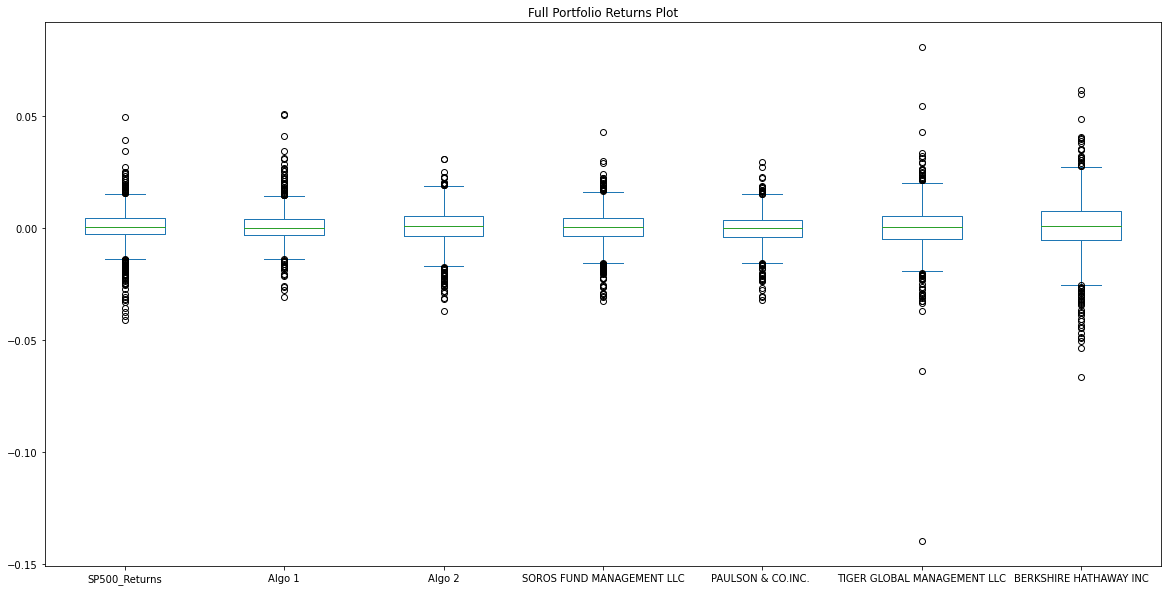

In [102]:
# Box plot to visually show risk
whale_returns_combined.plot.box(
figsize = (20,10),
title = "Full Portfolio Returns Plot"
)



### Calculate Standard Deviations

In [103]:
# Calculate the daily standard deviations of all portfolios
total_whale_volatility = whale_returns_combined.std()
total_whale_volatility.head()


SP500_Returns                0.008554
Algo 1                       0.007620
Algo 2                       0.008342
SOROS FUND MANAGEMENT LLC    0.007895
PAULSON & CO.INC.            0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [104]:
# Calculate the daily standard deviation of S&P 500
sp500_volatility = total_whale_volatility["SP500_Returns"]


# Determine which portfolios are riskier than the S&P 500
whale_avg_returns = whale_returns_combined.mean()
whale_returns_risk = (whale_avg_returns/total_whale_volatility)+1
whale_returns_risk

## Algo 1 is the only portfolio that is riskier than S&P 500


SP500_Returns                  1.040837
Algo 1                         1.086847
Algo 2                         1.031583
SOROS FUND MANAGEMENT LLC      1.022452
PAULSON & CO.INC.              0.969538
TIGER GLOBAL MANAGEMENT LLC    0.992374
BERKSHIRE HATHAWAY INC         1.039170
dtype: float64

### Calculate the Annualized Standard Deviation

In [105]:
# Calculate the annualized standard deviation (252 trading days)
annual_whale_volatility = whale_returns_combined.rolling(window=252).std()
annual_whale_volatility.tail()



,SP500_Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-16,0.009481,0.008211,0.008598,0.009383,0.007333,0.014700,0.015245
2019-04-17,0.009460,0.008240,0.008592,0.009375,0.007339,0.014696,0.015200
2019-04-18,0.009461,0.008228,0.008591,0.009369,0.007337,0.014692,0.015197
2019-04-22,0.009453,0.008221,0.008586,0.009354,0.007342,0.014674,0.015197
2019-04-23,0.009451,0.008224,0.008602,0.009351,0.007338,0.014639,0.015210


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

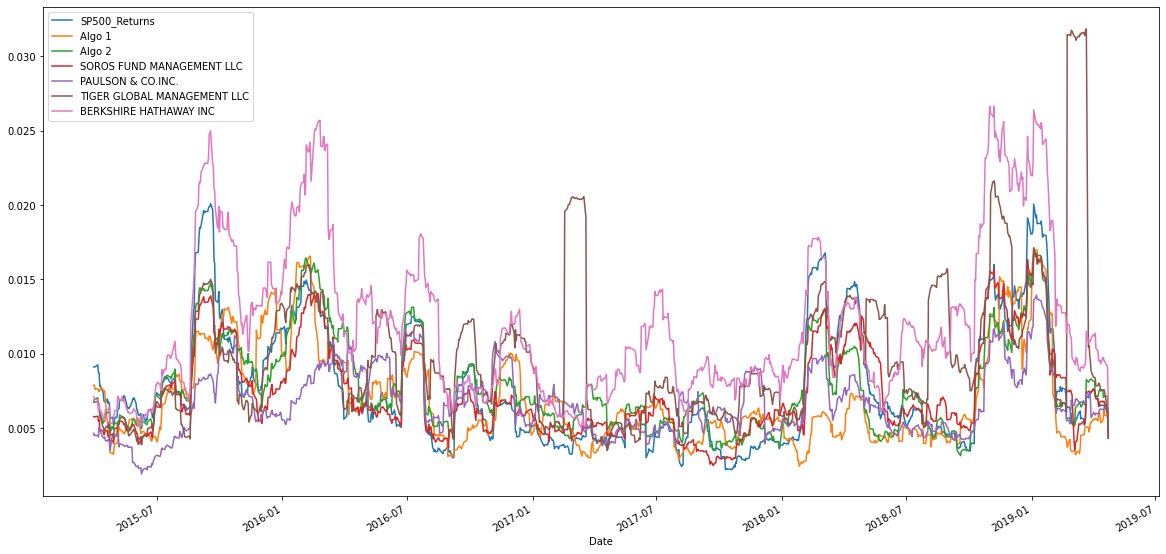

In [106]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
monthly_whale_volatility = whale_returns_combined.rolling(window=21).std()

# Plot the rolling standard deviation
monthly_whale_volatility.plot(
    figsize=(20,10)
)

### Calculate and plot the correlation

In [107]:
# Calculate the correlation
monthly_volatility_correlation = monthly_whale_volatility.corr()

# Display the correlation matrix
monthly_volatility_correlation

,SP500_Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SP500_Returns,1.000000,0.699671,0.901190,0.911914,0.597760,0.414108,0.812766
Algo 1,0.699671,1.000000,0.760948,0.721356,0.585584,0.265667,0.794022
Algo 2,0.901190,0.760948,1.000000,0.872922,0.688595,0.359691,0.824877
SOROS FUND MANAGEMENT LLC,0.911914,0.721356,0.872922,1.000000,0.664590,0.451969,0.859187
PAULSON & CO.INC.,0.597760,0.585584,0.688595,0.664590,1.000000,0.407927,0.631215
TIGER GLOBAL MANAGEMENT LLC,0.414108,0.265667,0.359691,0.451969,0.407927,1.000000,0.413311
BERKSHIRE HATHAWAY INC,0.812766,0.794022,0.824877,0.859187,0.631215,0.413311,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'30-Day Rolling Beta of Berkshire Hathaway via S&P500 Index'}, xlabel='Date'>

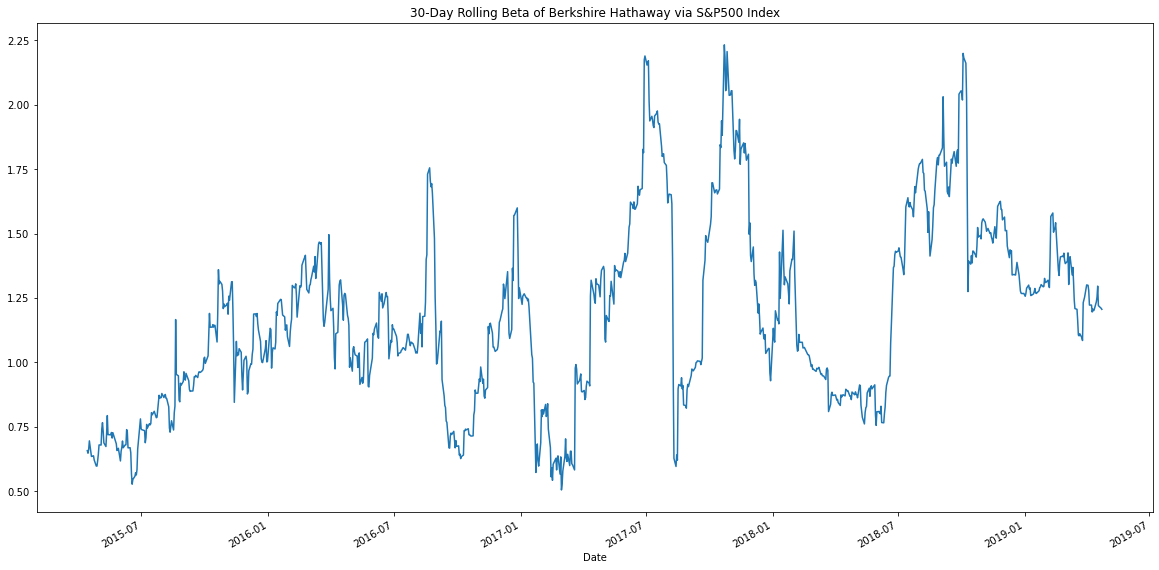

In [108]:
# Calculate covariance of a single portfolio
covariance_BSH = whale_returns_combined['BERKSHIRE HATHAWAY INC'].cov(whale_returns_combined['SP500_Returns'])

# Calculate variance of S&P 500
variance_SP500 = whale_returns_combined['SP500_Returns'].var()

# Computing beta
BSH_beta = covariance_BSH / variance_SP500

## The average risk to reward ratio (Beta) for BSH compared to the S&P 500 is 1.14

# Plot beta trend
rolling_covariance_BSH = whale_returns_combined['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(whale_returns_combined['SP500_Returns'])
rolling_variance_SP500 = whale_returns_combined['SP500_Returns'].rolling(window=30).var()
rolling_BSH_beta = rolling_covariance_BSH / rolling_variance_SP500
rolling_BSH_beta.plot(
    figsize=(20,10),
    title = '30-Day Rolling Beta of Berkshire Hathaway via S&P500 Index'
)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [109]:
# Use `ewm` to calculate the rolling window
BSH_ewm_volatility = whale_returns_combined['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).std()
BSH_ewm_volatility

Date
2015-03-03         NaN
2015-03-04    0.007624
2015-03-05    0.007020
2015-03-06    0.009387
2015-03-09    0.008066
                ...   
2019-04-16    0.011939
2019-04-17    0.011746
2019-04-18    0.011554
2019-04-22    0.011377
2019-04-23    0.011377
Name: BERKSHIRE HATHAWAY INC, Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [110]:
# Annualized Sharpe Ratios
whale_sharpe_ratios = (whale_returns_combined.mean() * 252) / (total_whale_volatility * np.sqrt(252))
whale_sharpe_ratios


SP500_Returns                  0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

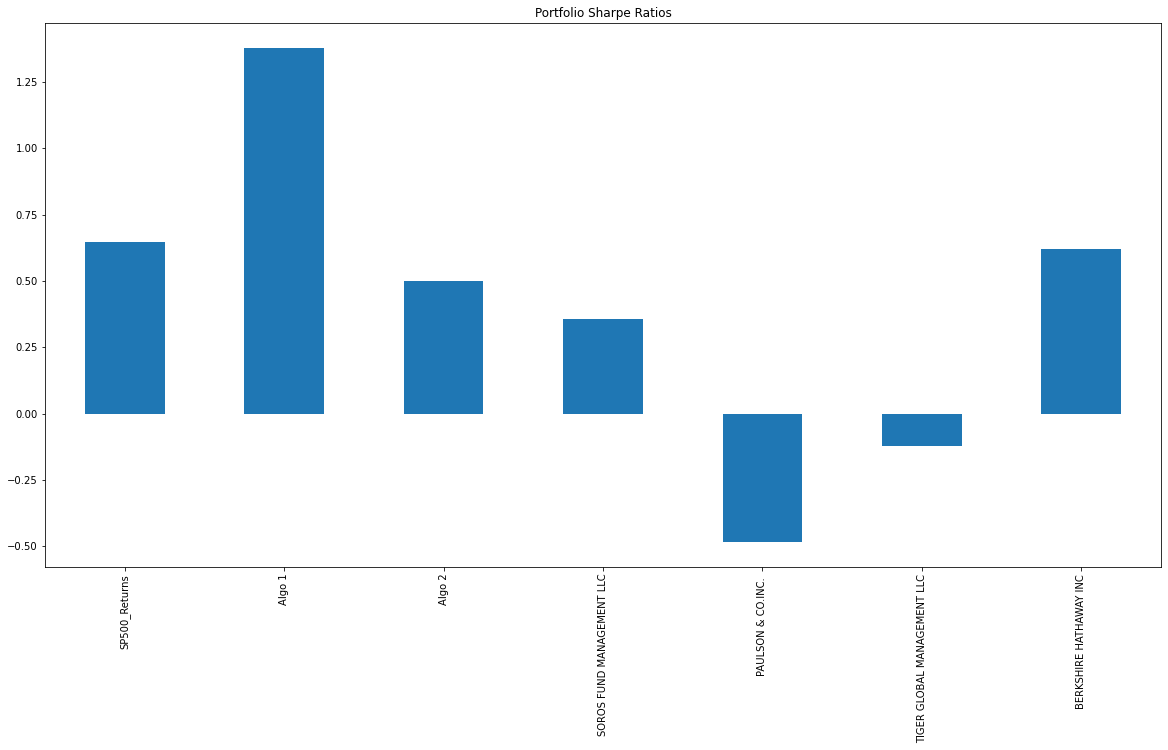

In [111]:
# Visualize the sharpe ratios as a bar plot
whale_sharpe_ratios.plot.bar(
    figsize = (20,10),
    title = "Portfolio Sharpe Ratios"
)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithm 1 seems to outperform the S&P 500 and the other whale portfolios in terms of risk-to-reward ratio.

It has recorded the greatest total of positive returns (profits) vs losses (defecits) and is the only portfolio with a Sharpe Ratio over "1".

Algorithm 2 seems to follow the S&P 500 more closely and seems to procure average returns weighted more equally to that of the average range spanning the whale portfolios.

Therefore, since Algo 1 and 2 have both been active for a similar duration, I would highly recommend that Harold applies more weight on Algo 1 than Algo 2 but ultimately keeps to both current algorithmic trading strategies regardless.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [112]:
# Reading data from 1st stock
aapl_df = pd.read_csv(Path('Resources/aapl_historical.csv'),
    index_col="Trade DATE",
    infer_datetime_format=True,
    parse_dates=True
    )
aapl_df.head()



,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [113]:
# Reading data from 2nd stock
goog_df = pd.read_csv(Path('Resources/goog_historical.csv'),
    index_col="Trade DATE",
    infer_datetime_format=True,
    parse_dates=True
)
goog_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [114]:
# Reading data from 3rd stock
cost_df = pd.read_csv(Path('Resources/cost_historical.csv'),
    index_col="Trade DATE",
    infer_datetime_format=True,
    parse_dates=True
)
cost_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [115]:
# Combine all stocks in a single DataFrame
full_portfolio_df = pd.concat([cost_df, goog_df, aapl_df], axis='columns', join='inner')
full_portfolio_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,GOOG,1162.38,AAPL,200.72
2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90
2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75


In [116]:
# Reset Date index
full_sorted_df = full_portfolio_df.sort_index(ascending=True)
full_sorted_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,COST,195.76,GOOG,1098.26,AAPL,188.59
2018-05-14,COST,195.88,GOOG,1100.20,AAPL,188.15
2018-05-15,COST,195.48,GOOG,1079.23,AAPL,186.44
2018-05-16,COST,198.71,GOOG,1081.77,AAPL,188.18
2018-05-17,COST,199.60,GOOG,1078.59,AAPL,186.99


In [117]:
# Reorganize portfolio data by having a column per symbol
columns = ["Costco","Costco Close","Google","Google Close","Apple","Apple Close"]
full_sorted_df.columns = columns
full_clean_df = full_sorted_df.drop(columns=['Costco', 'Google', 'Apple'])
full_clean_df.head()

,Costco Close,Google Close,Apple Close
Trade DATE,,,
2018-05-11,195.76,1098.26,188.59
2018-05-14,195.88,1100.20,188.15
2018-05-15,195.48,1079.23,186.44
2018-05-16,198.71,1081.77,188.18
2018-05-17,199.60,1078.59,186.99


In [118]:
# Calculate daily returns
full_portfolio_returns = full_clean_df.pct_change()

# Drop NAs
full_portfolio_returns.dropna(axis=1)

# Display sample data
full_portfolio_returns.head()

,Costco Close,Google Close,Apple Close
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.000613,0.001766,-0.002333
2018-05-15,-0.002042,-0.019060,-0.009088
2018-05-16,0.016523,0.002354,0.009333
2018-05-17,0.004479,-0.002940,-0.006324


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [119]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = full_portfolio_returns.dot(weights)

# Display sample data
weighted_returns

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [120]:
# Join your returns DataFrame to the original returns DataFrame
complete_returns_df = pd.concat([full_clean_df,full_portfolio_returns], axis='columns', join='inner')
returns_columns = ["Costco Close","Google Close","Apple Close", "Costco Returns", "Google Returns", "Apple Returns"]
complete_returns_df.columns = returns_columns
complete_returns_df.head()

,Costco Close,Google Close,Apple Close,Costco Returns,Google Returns,Apple Returns
Trade DATE,,,,,,
2018-05-11,195.76,1098.26,188.59,NaN,NaN,NaN
2018-05-14,195.88,1100.20,188.15,0.000613,0.001766,-0.002333
2018-05-15,195.48,1079.23,186.44,-0.002042,-0.019060,-0.009088
2018-05-16,198.71,1081.77,188.18,0.016523,0.002354,0.009333
2018-05-17,199.60,1078.59,186.99,0.004479,-0.002940,-0.006324


In [121]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
clean_returns_df = complete_returns_df.dropna()
clean_returns_df.head()

,Costco Close,Google Close,Apple Close,Costco Returns,Google Returns,Apple Returns
Trade DATE,,,,,,
2018-05-14,195.88,1100.20,188.15,0.000613,0.001766,-0.002333
2018-05-15,195.48,1079.23,186.44,-0.002042,-0.019060,-0.009088
2018-05-16,198.71,1081.77,188.18,0.016523,0.002354,0.009333
2018-05-17,199.60,1078.59,186.99,0.004479,-0.002940,-0.006324
2018-05-18,198.96,1066.36,186.31,-0.003206,-0.011339,-0.003637


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [122]:
# Calculate the annualized `std`
annual_returns_vol = full_portfolio_returns.std()
annual_returns_vol

Costco Close    0.013186
Google Close    0.016602
Apple Close     0.018706
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Return Volatility'}, xlabel='Trade DATE'>

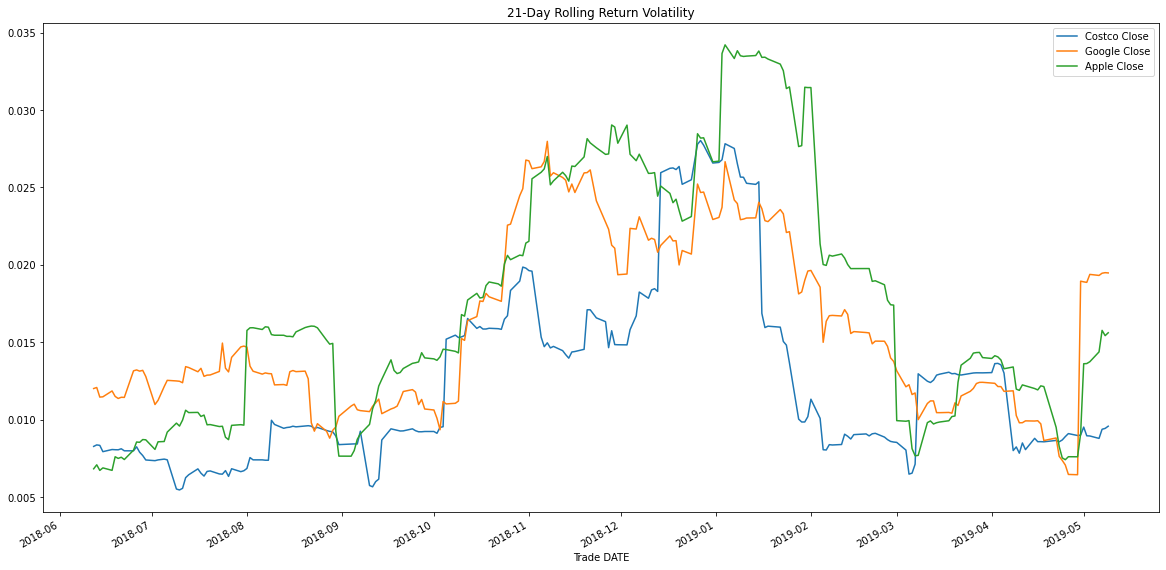

In [123]:
# Calculate rolling standard deviation
monthly_returns_vol = full_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
monthly_returns_vol.plot(
    figsize=(20,10),
    title='21-Day Rolling Return Volatility'
)

### Calculate and plot the correlation

In [124]:
# Calculate and plot the correlation
monthly_vol_correlation = monthly_returns_vol.corr()
monthly_vol_correlation

,Costco Close,Google Close,Apple Close
Costco Close,1.000000,0.709679,0.727557
Google Close,0.709679,1.000000,0.852192
Apple Close,0.727557,0.852192,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-Day Personal Portfolio Beta'}>

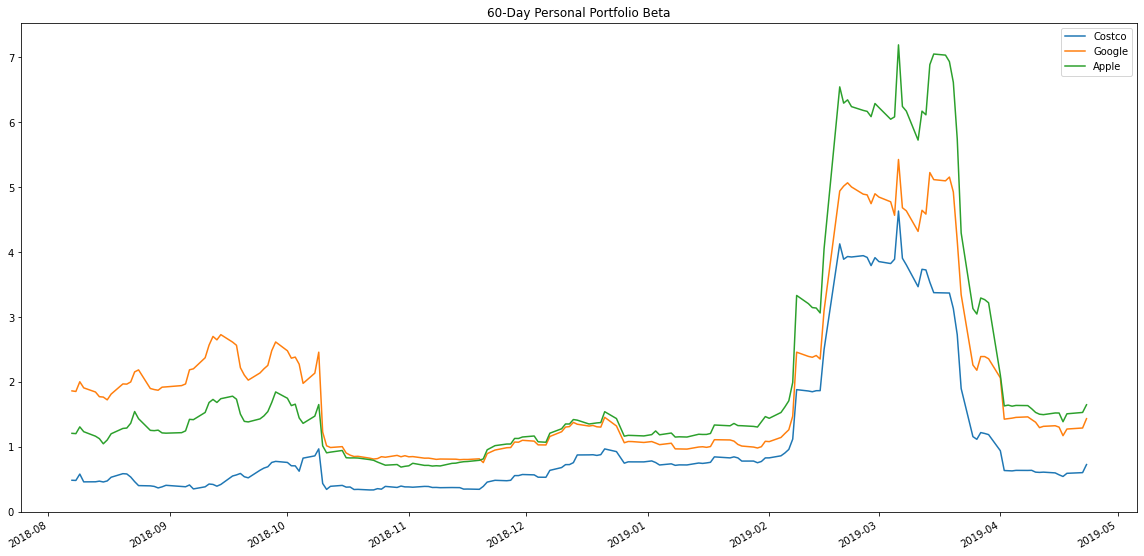

In [125]:
# Calculate and plot Beta
## Calculate personal portfolio covariance against S&P 500 Returns
covariance_costco = full_portfolio_returns['Costco Close'].cov(whale_returns_combined['SP500_Returns'])
covariance_google = full_portfolio_returns['Google Close'].cov(whale_returns_combined['SP500_Returns'])
covariance_apple = full_portfolio_returns['Apple Close'].cov(whale_returns_combined['SP500_Returns'])

## Calculate Beta using previously calculated S&P 500 Returns Variance
costco_beta =  covariance_costco / variance_SP500
google_beta = covariance_google / variance_SP500
apple_beta = covariance_apple / variance_SP500
portfolio_beta_avg = (costco_beta + google_beta + apple_beta) / 3

### The average risk to reward ratio (Beta) for our full portfolio is 1.52

## Plot beta trend
rolling_covariance_costco = full_portfolio_returns['Costco Close'].rolling(window=60).cov(whale_returns_combined['SP500_Returns'])
rolling_covariance_google = full_portfolio_returns['Google Close'].rolling(window=60).cov(whale_returns_combined['SP500_Returns'])
rolling_covariance_apple = full_portfolio_returns['Apple Close'].rolling(window=60).cov(whale_returns_combined['SP500_Returns'])
rolling_costco_beta = rolling_covariance_costco / rolling_variance_SP500
rolling_google_beta = rolling_covariance_google / rolling_variance_SP500
rolling_apple_beta = rolling_covariance_apple/ rolling_variance_SP500
portfolio_beta_trend = pd.concat([rolling_costco_beta, rolling_google_beta, rolling_apple_beta], axis = 'columns', join='inner')
new_columns = ['Costco', 'Google', 'Apple']
portfolio_beta_trend.columns = new_columns
portfolio_beta_trend.plot(
    figsize=(20,10),
    title='60-Day Personal Portfolio Beta'
)


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [126]:
# Calculate Annualized Sharpe Ratios
full_portfolio_sharpe = (full_portfolio_returns.mean() * 252) / (annual_returns_vol * np.sqrt(252))
full_portfolio_sharpe


Costco Close    1.160482
Google Close    0.349657
Apple Close     0.361306
dtype: float64

<AxesSubplot:title={'center':'Avg Annual Portfolio Sharpe Ratios'}>

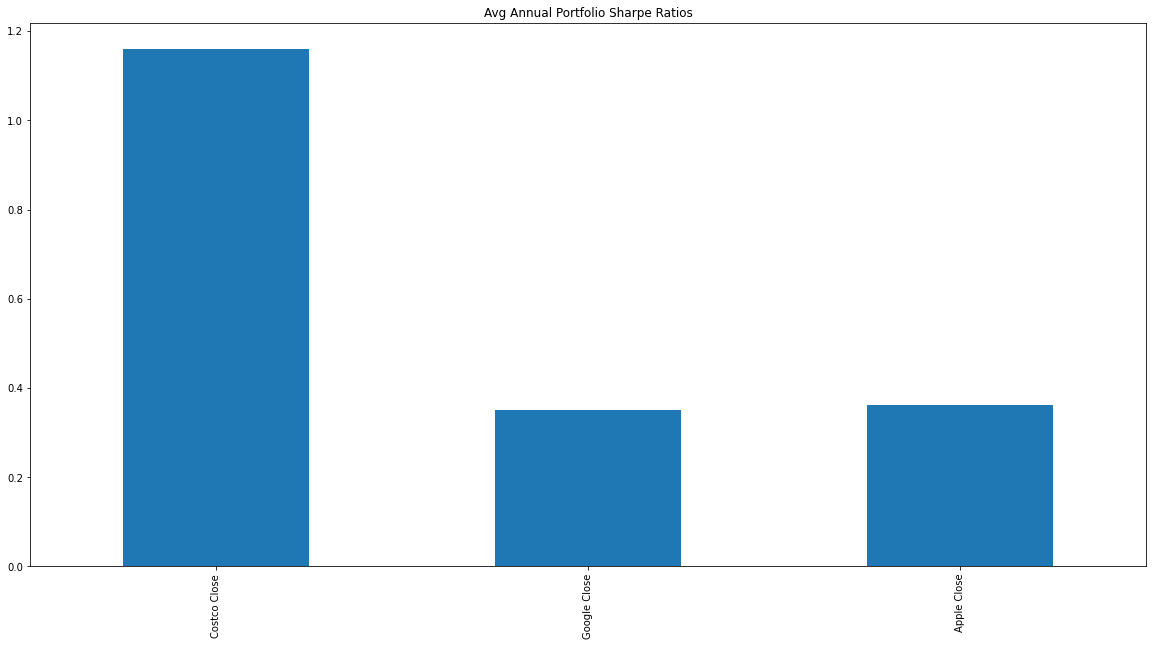

In [127]:
# Visualize the sharpe ratios as a bar plot
full_portfolio_sharpe.plot.bar(
    figsize=(20,10),
    title='Avg Annual Portfolio Sharpe Ratios'
)

### How does your portfolio do?

Our personal portfolio did well overall as no money was lost.
However between 2018 and 2019 our strategy seems to have maintained a relatively stagnant profitability rate outside of a couple Beta spikes.
Therefore, while there is no need for immediate concern, if greater risk and/or time-to-profit is an option (since a majority of the 60-day rolling Beta implicates the risk to reward consistently returns to near "0") I would be inclined to ammend our current trading strategies in a way that aligns more closely with that of Harold's algorithms.

